### This Notebook contains Exploratory Data Analysis for the Dataset

Dataset info: 
* Dataset contains info about students and the factors affecting their grades.
* Dataset has 8 columns and 1000 rows.
* Scores are the dependent variables and other factors are the independent variables.


#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### checking missing values 
* if present use mean and mode imputation

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### checking duplicates

In [6]:
df.duplicated().sum()

0

#### checking data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### checking unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### check for data stats

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:

* means are very close to each other
* std is between 14.6 - 15.2

#### Exploring data

In [10]:
## unique values in a columns
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
#defining numerical and categorical columns

numerical_features = [features for features in df.columns if df[features].dtype != 'O']  #NOT EQUAL TO OBJECT
categorical_features = [features for features in df.columns if df[features].dtype == 'O']  #EQUAL TO OBJECT

In [13]:
print(numerical_features)

['math score', 'reading score', 'writing score']


In [14]:
print(categorical_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns

In [ ]:
##adding columns

df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total score']/3

In [16]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### more insights

In [17]:
#students full marks in maths

full_maths = df[df['math score'] == 100]

In [18]:
full_maths

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [20]:
full_maths['Average'].count()

7

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
#students with less than 20 marks in reading

read_less = df[df['reading score']<=20]

In [24]:
read_less.count()

gender                         1
race/ethnicity                 1
parental level of education    1
lunch                          1
test preparation course        1
math score                     1
reading score                  1
writing score                  1
Total score                    1
Average                        1
dtype: int64

In [25]:
read_less

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.0


In [28]:
read_less['Average'].count()

1

### Exploratory Data Visualization

#### Histogram and KDE

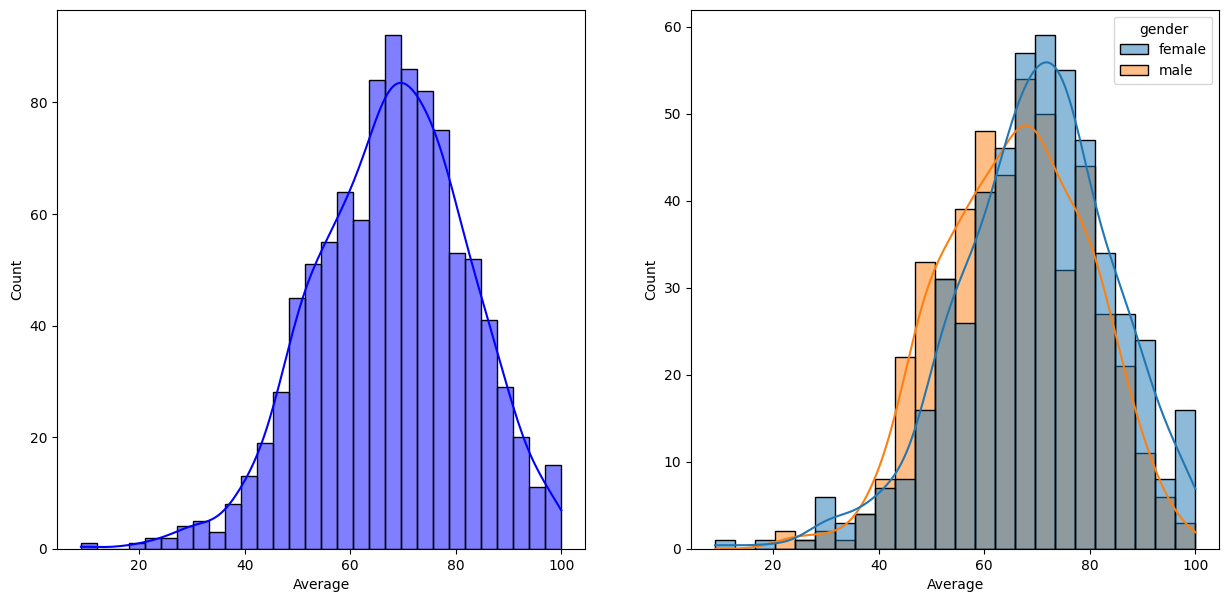

In [31]:
## Average marks based on gender:

fig, ax = plt.subplots(1, 2, figsize = (15 ,7))
plt.subplot(121)
sns.histplot(x = 'Average', bins = 30, data = df, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(x = 'Average', data = df, kde = True, hue = 'gender')
plt.show()